In [85]:

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

In [86]:
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('data/WISDM_ar_v1.1_raw.txt', header = None, names = columns,on_bad_lines='skip',sep=",")

In [87]:
df = df.dropna()



In [89]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


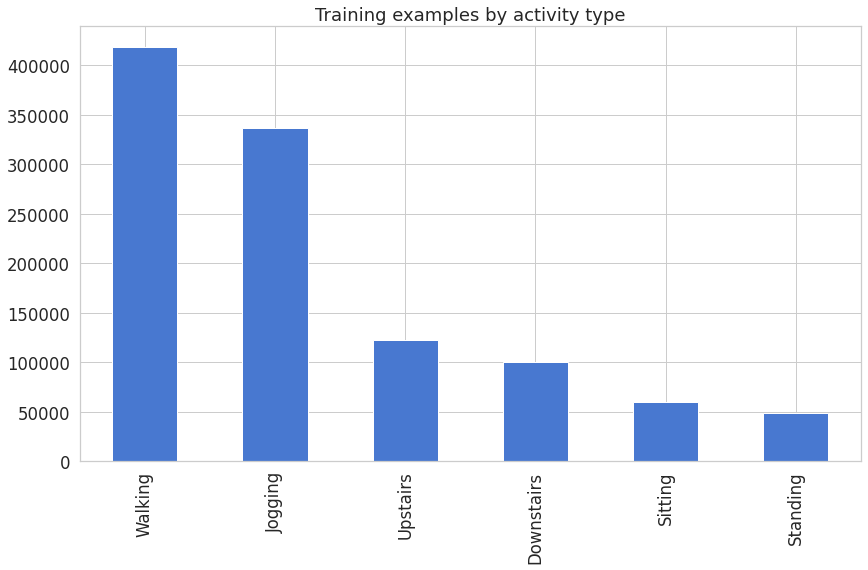

In [90]:
df['activity'].value_counts().plot(kind='bar', title='Training examples by activity type');

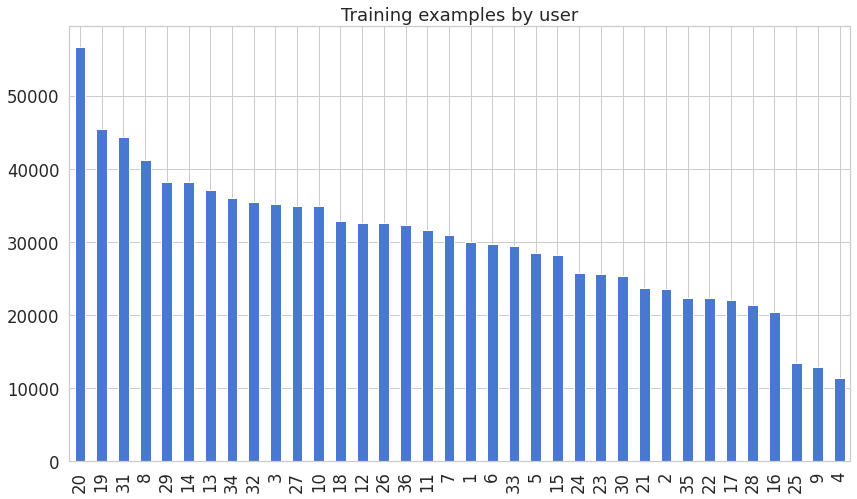

In [91]:
df['user'].value_counts().plot(kind='bar', title='Training examples by user');

In [92]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['x-axis', 'y-axis', 'z-axis']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12),
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

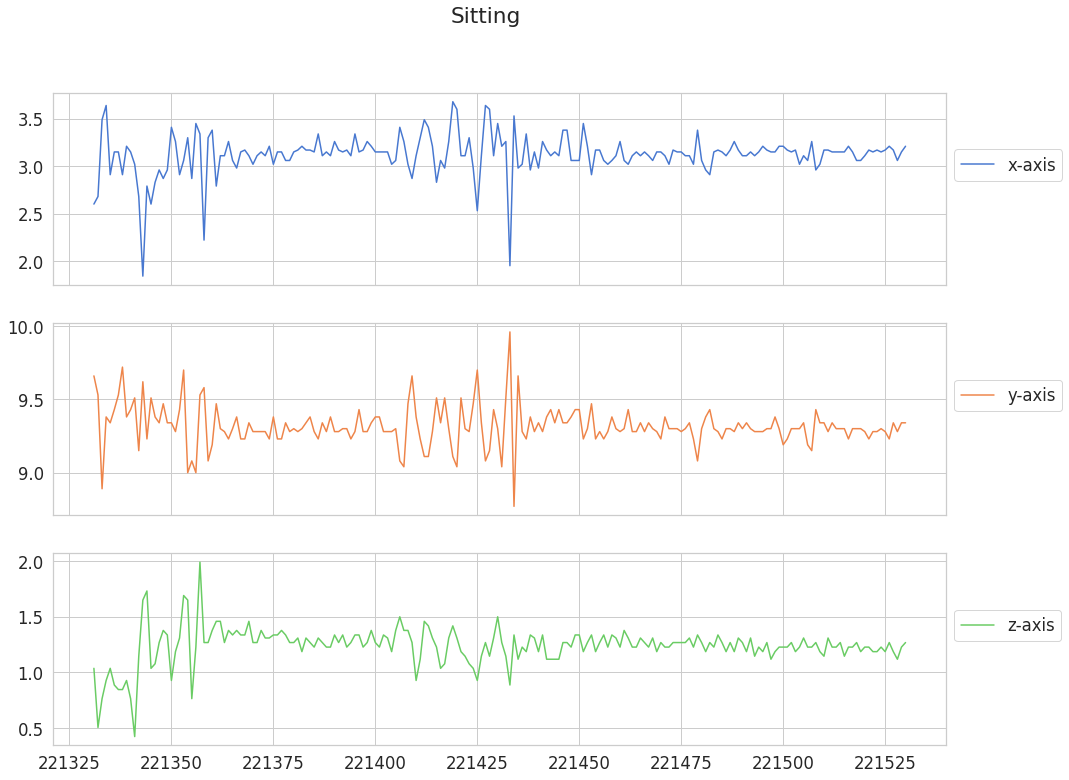

In [93]:
plot_activity("Sitting", df)

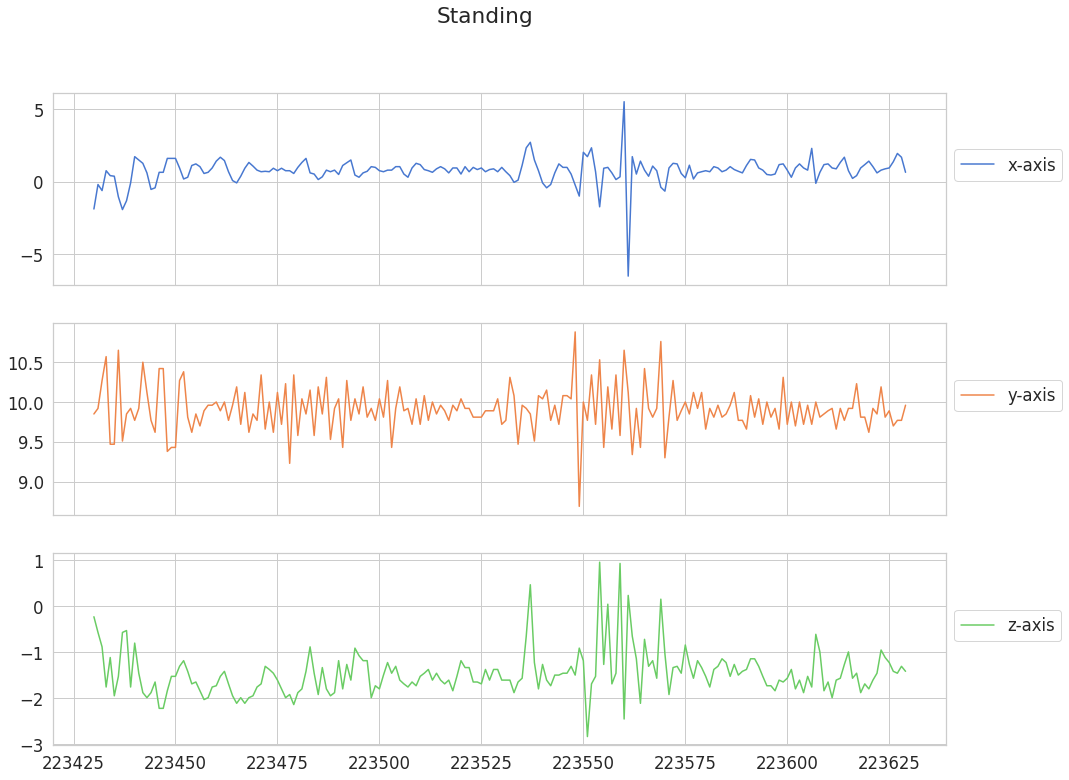

In [94]:
plot_activity("Standing", df)

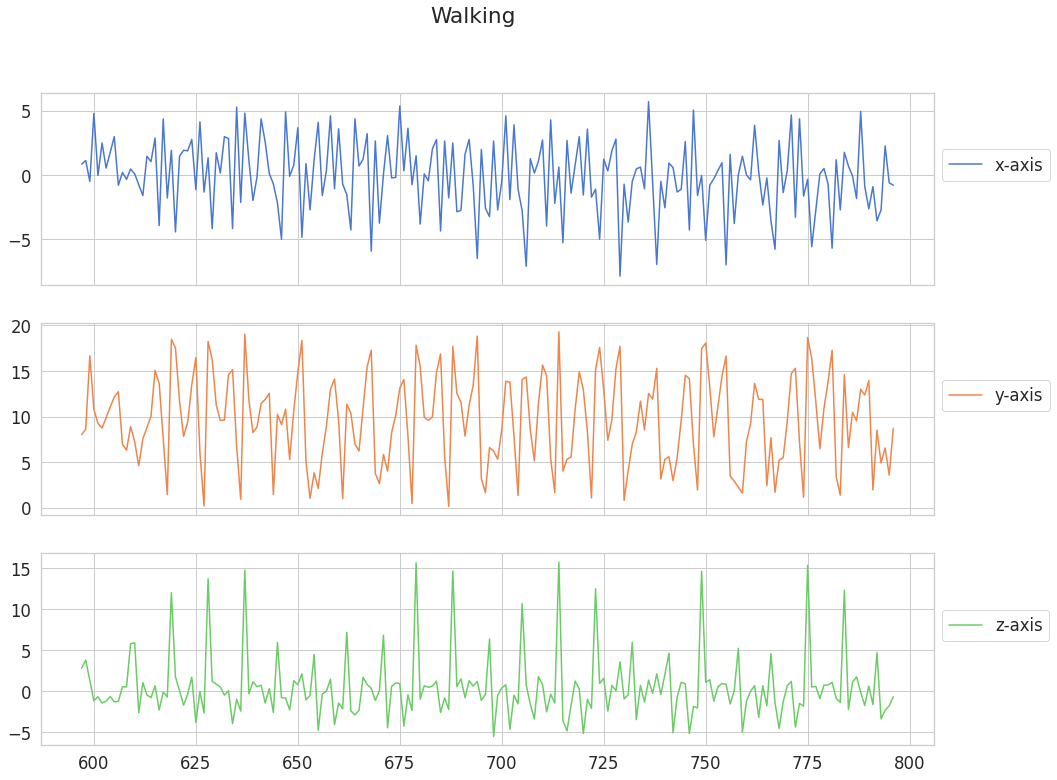

In [95]:
plot_activity("Walking", df)

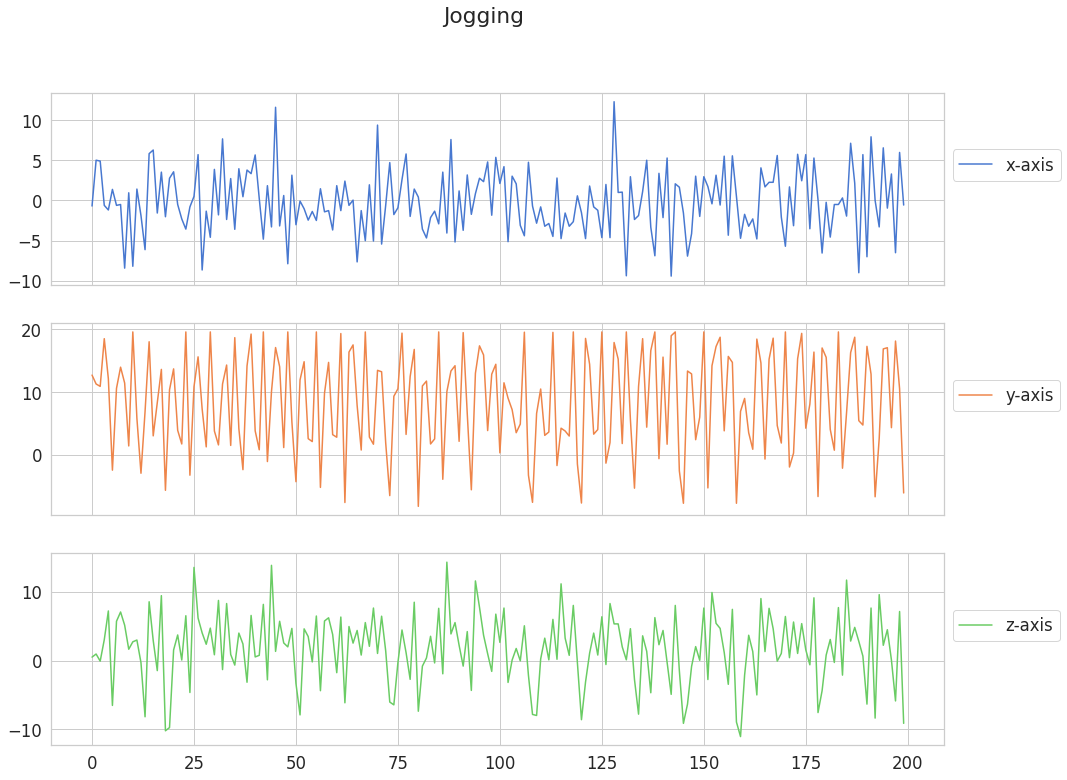

In [96]:
plot_activity("Jogging", df)

In [97]:
N_TIME_STEPS = 200
N_FEATURES = 3
step = 20
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):
    xs = df['x-axis'].values[i: i + N_TIME_STEPS]
    ys = df['y-axis'].values[i: i + N_TIME_STEPS]
    zs = df['z-axis'].values[i: i + N_TIME_STEPS]
    label = stats.mode(df['activity'][i: i + N_TIME_STEPS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)


In [98]:
np.array(segments).shape




(54314, 3, 200)

In [99]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [100]:
reshaped_segments.shape

(54314, 200, 3)

In [174]:
print(reshaped_segments[19864])
labels[19864]

[[4.44      4.4       4.25     ]
 [4.25      4.33      4.29     ]
 [4.21      4.25      4.37     ]
 [4.33      4.25      4.25     ]
 [4.37      4.29      4.25     ]
 [4.21      4.29      4.25     ]
 [4.29      4.29      4.25     ]
 [4.25      4.33      4.21     ]
 [4.21      4.4       4.4      ]
 [4.37      4.18      4.14     ]
 [4.29      4.44      4.37     ]
 [4.33      4.25      4.29     ]
 [4.29      4.33      4.25     ]
 [4.37      4.4       4.37     ]
 [4.33      4.33      4.33     ]
 [4.29      4.29      4.29     ]
 [4.29      4.37      4.33     ]
 [4.25      4.29      4.33     ]
 [4.25      4.25      4.25     ]
 [4.29      4.25      4.29     ]
 [4.21      4.21      4.21     ]
 [4.21      4.25      4.21     ]
 [4.18      4.21      4.21     ]
 [4.25      4.14      4.14     ]
 [4.18      4.18      4.14     ]
 [4.18      4.29      4.18     ]
 [4.25      4.14      4.14     ]
 [4.1       4.4       3.99     ]
 [4.29      3.79      4.25     ]
 [4.33      4.21      4.21     ]
 [4.29    

array([0., 0., 1., 0., 0., 0.], dtype=float32)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

In [103]:
len(X_train)

43451

In [104]:
len(X_test)

10863

In [134]:
N_CLASSES = 6
N_HIDDEN_UNITS = 64

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [135]:
regressor = Sequential()

In [136]:
regressor.add(LSTM(units=64, return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=64, return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=64, return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=64, return_sequences=False))
regressor.add(Dropout(0.2))



In [137]:
regressor.add(Dense(units=6, activation='softmax'))
regressor.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 50
batch_size = 1024

In [138]:
history = regressor.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Train on 39105 samples, validate on 4346 samples


2022-04-12 16:55:23.213484: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 16:55:23.213927: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 16:55:23.214221: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 16:55:23.214586: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 16:55:23.214876: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

Epoch 1/50
39105/39105 [==============================] - ETA: 0s - loss: 1.1232 - acc: 0.5638  

/home/shrisheshpratik/.local/lib/python3.9/site-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


39105/39105 [==============================] - 105s 3ms/sample - loss: 1.1232 - acc: 0.5638 - val_loss: 0.7493 - val_acc: 0.7499
Epoch 2/50
39105/39105 [==============================] - 98s 3ms/sample - loss: 0.6927 - acc: 0.7636 - val_loss: 0.6016 - val_acc: 0.7738

In [139]:
accr = regressor.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.072
  Accuracy: 0.977


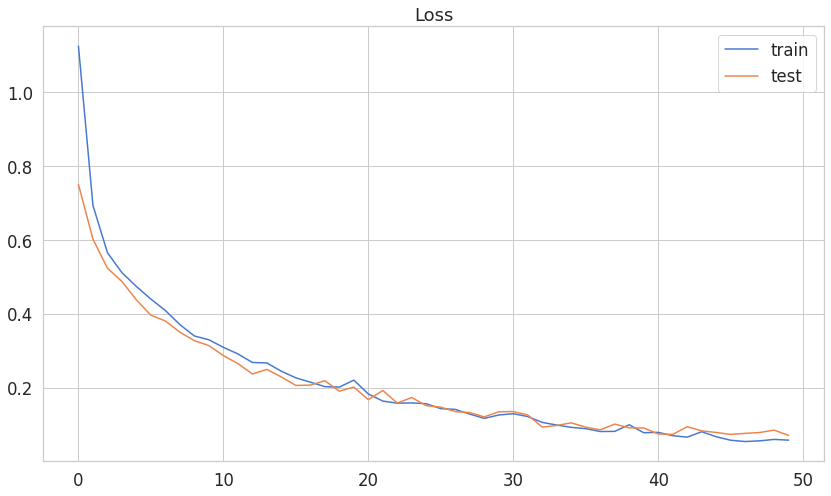

In [140]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

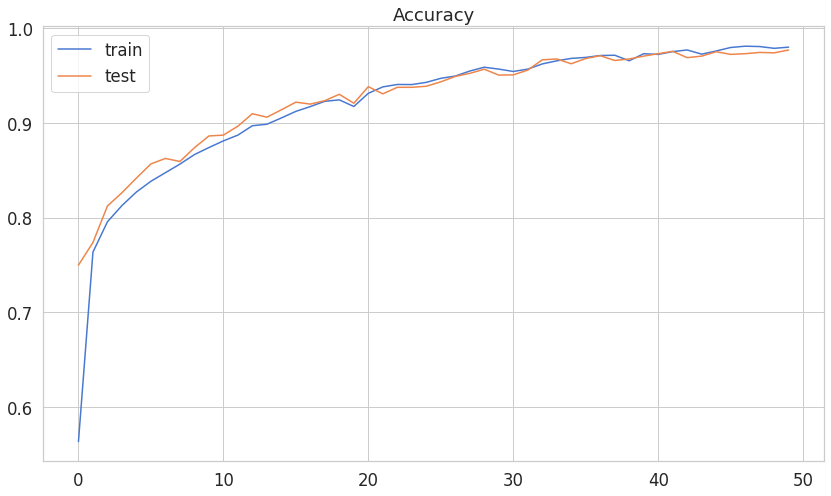

In [141]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [147]:
predicted_val = regressor.predict(X_test)

In [148]:
print(predicted_val)

[[2.57084123e-03 6.12731310e-05 8.62686575e-05 1.36283525e-05
  9.90583658e-01 6.68432610e-03]
 [3.70636781e-06 9.99876618e-01 3.46890420e-06 1.83178945e-05
  5.80959022e-05 3.97536096e-05]
 [1.75447767e-05 9.98720825e-01 3.57338217e-06 1.83982211e-05
  7.52307184e-04 4.87303099e-04]
 ...
 [9.97841001e-01 7.56447771e-05 4.48558021e-05 1.33453232e-05
  1.79857155e-03 2.26526638e-04]
 [8.85995686e-01 1.89330080e-04 1.83411583e-04 1.42983379e-04
  1.06922239e-01 6.56631403e-03]
 [3.96004179e-05 9.97595131e-01 5.54790267e-06 8.43209091e-06
  2.31763395e-03 3.36428493e-05]]


In [149]:
regressor.save('models/v1')

#TO LOAD MODEL
# model = keras.models.load_model('models/v1')

In [206]:
columns2 = ['x-axis', 'y-axis', 'z-axis']
df2 = pd.read_csv('data/data2.txt', header = None, names = columns2,on_bad_lines='skip',sep=",")
df2 = df2.dropna()
df2.head()

,x-axis,y-axis,z-axis
0,-0.968466,0.269772,-0.082259
1,-1.001163,0.130601,-0.062739
2,-0.984326,0.108641,-0.053711
3,-1.033401,0.078355,-0.058102
4,-0.987499,0.140361,-0.011224


In [207]:

N_TIME_STEPS = 200
N_FEATURES = 3
step = 20
segments2 = []

for i in range(0, len(df2) - N_TIME_STEPS, step):
    xs = df2['x-axis'].values[i: i + N_TIME_STEPS]
    ys = df2['y-axis'].values[i: i + N_TIME_STEPS]
    zs = df2['z-axis'].values[i: i + N_TIME_STEPS]
    segments2.append([xs, ys, zs])

In [208]:
np.array(segments2).shape

(80, 3, 200)

In [209]:
reshaped_segments2 = np.asarray(segments2, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
reshaped_segments2.shape

(80, 200, 3)

In [210]:
predicted_val = regressor.predict(reshaped_segments2)

In [214]:
def predict_activity(l):

    if(l[0]>l[1] and l[0]>l[2] and l[0]>l[3] and l[0]>l[4] and l[0]>l[5]):
        return 'Downstairs'


    if(l[1]>l[0] and l[1]>l[2] and l[1]>l[3] and l[1]>l[4] and l[1]>l[5]):
        return 'Jogging'

    if(l[2]>l[0] and l[2]>l[1] and l[2]>l[3] and l[2]>l[4] and l[2]>l[5]):
        return 'Sitting'


    if(l[3]>l[0] and l[3]>l[1] and l[3]>l[2] and l[3]>l[4] and l[3]>l[5]):
        return 'Standing'



    if(l[4]>l[0] and l[4]>l[1] and l[4]>l[2] and l[4]>l[3] and l[4]>l[5]):
        return 'Upstairs'



    if(l[5]>l[0] and l[5]>l[1] and l[5]>l[2] and l[5]>l[3] and l[5]>l[4]):
        return 'Walking'

    return 'Error'


In [215]:
res = []

###############    IDEA ---- SLIDING WINDOW MAX IN RESULT ALSO #################
for val in predicted_val:
    res.append(predict_activity(val))

print(res)

['Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Sitting', 'Walking', 'Walking', 'Walking']
